In [ ]:
#!pip install celery

In [ ]:
#!sudo rabbitmqctl add_user myguest myguestpwd
#!sudo rabbitmqctl set_permissions -p / myguest "." "." ".*"

In [ ]:
#!sudo rabbitmqctl list_users

In [73]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.datasets import make_blobs
from copy import deepcopy

from celery import group
from kmeans_workers import kmeans_tasks, dist, NumpyEncoder
import pandas as pd

In [74]:
n_clusters=3
n_workers =4

In [75]:
# Creating a n_features=2 Dim dataset with centers=3 clusters
# Xs, Ys = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters)
Xs = pd.read_csv('./data/magic.csv')
Xs = Xs.to_numpy()
Xs = Xs[1:, 1:]
Xs = np.array(Xs, dtype=float)
v = np.min(Xs)
myData = [{"points": x-v, "label": np.random.randint(n_clusters)} for x in Xs]

In [76]:
n_samples=Xs.shape[0]
n_features=Xs.shape[1]


In [77]:
# print(len(mydata))
# print(mydata[15]['points'],mydata[15]['label'])

In [78]:
# Split the sequence in a number of chunks and process those independently.

l = n_samples // n_workers
Xsubseqs = [Xs[i * l:(i + 1) * l] for i in range(n_workers - 1)]
Xsubseqs.append(Xs[(n_workers - 1) * l:])


In [79]:
len(Xsubseqs[0])

372

In [80]:
np.matrix(np.diag(np.max(Xs,0)))

matrix([[0.74600319, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.86150904, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.69707936, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.58002254, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.67384291,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.64728397]])

In [81]:
C=np.matrix(np.random.rand(n_clusters,n_features))*np.matrix(np.diag(np.max(Xs,0)))
print("Initial Centroids")
print(C)


Initial Centroids
[[0.67080281 0.85814192 0.21051431 ... 0.47875653 0.20211394 0.5953829 ]
 [0.65863741 0.05836373 0.54364247 ... 0.25879295 0.25451174 0.21323796]
 [0.12694551 0.78883301 0.44952325 ... 0.0744509  0.10276975 0.28307192]]


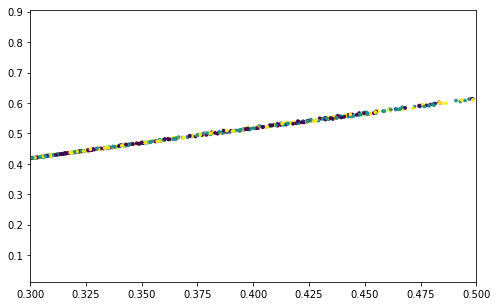

In [82]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
fig = plt.figure()

# Plotting along with the Centroids
#plt.scatter([actdata.points[0] for actdata in mydata], [actdata.points[1] for actdata in mydata])
plt.xlim(0.3, 0.5)
plt.scatter([actdata['points'][0] for actdata in myData], [actdata['points'][1] for actdata in myData], c=[actdata['label'] for actdata in myData], s=7)

plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')


In [70]:
# len([actdata['label'] for actdata in mydata])

In [71]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)

56.84777318541074


In [ ]:
print(C)
print(C.shape)

In [ ]:
partials_Estep=[json.loads(kmeans_tasks(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)))['X'] for seq in Xsubseqs]

In [ ]:
# the updated labels are here:
len(partials_Estep[0])

In [ ]:
len(partials_Estep)

In [ ]:
partials_Mstep=[json.loads(kmeans_tasks(task='mstep', json_dump = json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, cls=NumpyEncoder)))['C'] for seq in partials_Estep]

In [ ]:
partials_Mstep

In [ ]:
C=np.sum(partials_Mstep,0)/n_workers
print(C)

In [ ]:
# Storing the old centroid values
C_old = deepcopy(C)
 

In [ ]:
# Plotting along with the Centroids

#plt.scatter([actdata.points[0] for actdata in mydata], [actdata.points[1] for actdata in mydata],c='#050505', s=7)
plt.scatter([actdata['points'][0] for actdata in myData], [actdata['points'][1] for actdata in myData],c=[actdata['label'] for actdata in myData], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')


### Everything together

(3, 2753)
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
0.0
372
372
372
374


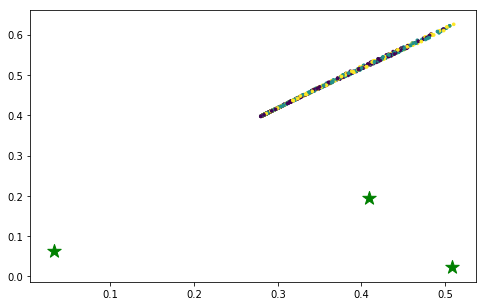

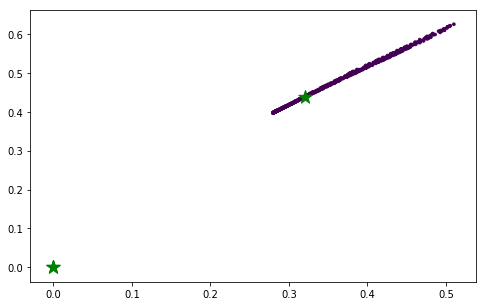

(3, 2753)
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
0.0
372
372
372
374


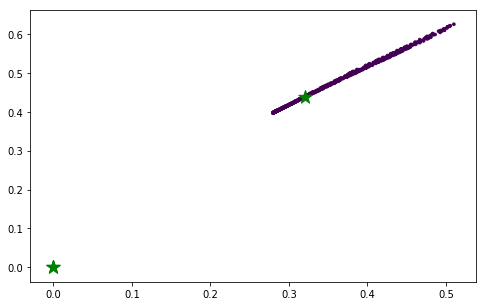

(3, 2753)
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
0.0
372
372
372
374


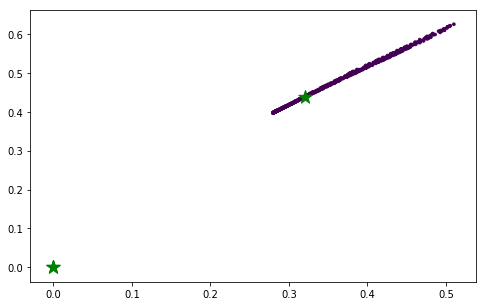

(3, 2753)
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
*** we are in the M-Step ***
 *** Cluster centers updated. M-step done ***
0.0
372
372
372
374


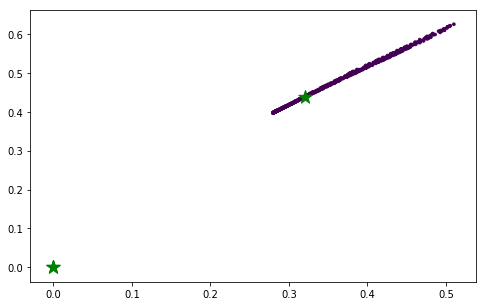

(3, 2753)
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***
*** we are in the E-Step ***
 *** Labels updated. E-step done ***


In [ ]:
# Split the sequence in a number of chunks and process those independently.
n_workers = 4
n_iter = 5

l = n_samples // n_workers
Xsubseqs = [myData[i * l:(i + 1) * l] for i in range(n_workers - 1)]
Xsubseqs.append(myData[(n_workers - 1) * l:])
C=np.matrix(np.random.rand(n_clusters,n_features))*np.matrix(np.diag(np.max(Xs,0)))

#plt.scatter([actdata.points[0] for actdata in mydata], [actdata.points[1] for actdata in mydata],c='#050505', s=7)
plt.scatter([actdata["points"][0] for actdata in myData], [actdata["points"][1] for actdata in myData], c=[actdata['label'] for actdata in myData], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')

for iter in range(0, n_iter):    

    print(C.shape)
    
    #class assignnment
    partials_Estep=[json.loads(kmeans_tasks(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)))['X'] for seq in Xsubseqs]
    
    #centroid update assignnment
    partials_Mstep=[json.loads(kmeans_tasks(task='mstep', json_dump = json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, cls=NumpyEncoder)))['C'] for seq in partials_Estep]
    
    C=np.sum(partials_Mstep,0)/n_workers
    C_old = deepcopy(C)
    error = dist(C, C_old, None)
    print(error)

    Xsubseqs=deepcopy(partials_Estep)
    
    mydata_updated=[]
    for seq in partials_Estep:
        mydata_updated.extend(seq)
        print(len(seq))
    len(mydata_updated)

    plt.rcParams['figure.figsize'] = (8, 5)
    fig = plt.figure()
#     plt.xlim(0.007, 0.0115)
    plt.scatter([actdata['points'][0] for actdata in mydata_updated], [actdata['points'][1] for actdata in mydata_updated],c=[actdata['label'] for actdata in mydata_updated], s=7)

    plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')
    plt.show()
    
    #time.sleep(2)


### Distributed Kmeans

In [ ]:
# Split the sequence in a number of chunks and process those independently.
n_workers = 4
n_iter =5

l = n_samples // n_workers
Xsubseqs = [mydata[i * l:(i + 1) * l] for i in range(n_workers - 1)]
Xsubseqs.append(mydata[(n_workers - 1) * l:])
C=np.matrix(np.random.rand(n_clusters,n_features))*np.matrix(np.diag(np.max(Xs,0)))

#plt.scatter([actdata.points[0] for actdata in mydata], [actdata.points[1] for actdata in mydata],c='#050505', s=7)
plt.scatter([actdata['points'][0] for actdata in mydata], [actdata['points'][1] for actdata in mydata],c=[actdata['label'] for actdata in mydata], s=7)
plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')


In [ ]:
#class assignnment
#lazy_partials_Estep = group(kmeans_tasks.s(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) for seq in Xsubseqs)() 
# call remote workers to run the sort task 
#tmp_partials_Estep = lazy_partials_Estep.get() # will wait for the tasks to return


In [ ]:
for iter in range(0, n_iter):    

    print(C.shape)
    
    #class assignnment
    lazy_partials_Estep = group(kmeans_tasks.s(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) 
                                               for seq in Xsubseqs)() 
    # call remote workers to run the sort task 
    tmp_partials_Estep = lazy_partials_Estep.get() # will wait for the tasks to return
    partials_Estep=[json.loads(seq)['X'] for seq in tmp_partials_Estep]

    #partials_Estep=[kmeans_tasks(task='estep', json_dump = json.dumps({'C': C, 'X': seq}, cls=NumpyEncoder)) for seq in Xsubseqs]
    
    #centroid update assignnment
    lazy_partials_Mstep = group(kmeans_tasks.s(task='mstep', json_dump = 
                                               json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, 
                                                          cls=NumpyEncoder)) for seq in partials_Estep)()
    tmp_partials_Mstep = lazy_partials_Mstep.get()  
    partials_Mstep=[json.loads(seq)['C'] for seq in tmp_partials_Mstep]
    #partials_Mstep=[kmeans_tasks(task='mstep', json_dump = json.dumps({'X': seq, 'n_clusters': n_clusters, 'n_features':n_features}, cls=NumpyEncoder)) for seq in partials_Estep]
    
    C=np.sum(partials_Mstep,0)/n_workers
    C_old = deepcopy(C)
    error = dist(C, C_old, None)
    print(error)

    Xsubseqs=deepcopy(partials_Estep)
    
    # plotting
    mydata_updated=[]
    for seq in partials_Estep:
        mydata_updated.extend(seq)
        print(len(seq))
    len(mydata_updated)

    plt.rcParams['figure.figsize'] = (8, 5)
    fig = plt.figure()
    plt.scatter([actdata['points'][0] for actdata in mydata_updated], [actdata['points'][1] for actdata in mydata_updated],c=[actdata['label'] for actdata in mydata_updated], s=7)

    plt.scatter(np.array(C[:,0]), np.array(C[:,1]), marker='*', s=200, c='g')
    plt.show()
    
    #time.sleep(2)

    
    

